In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

In [5]:
file_path = Path("..\Starter_Code\myopia.csv")
df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [6]:
y = df["MYOPIC"].values
X = df.drop("MYOPIC", axis=1)

In [11]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
#in fit_transform, should I have kept 'df' instead of the dropped column version 'X'?

In [12]:
X.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY'],
      dtype='object')

In [15]:
pca = PCA(n_components=0.90)
df_pca = pca.fit_transform(X)

In [19]:
df_new= pd.DataFrame(
    data=df_pca,
    columns=["principal component 1", "principal component 2", "principal component 3"],
)
df_new.head()
#class examples have either 2 or 3 principal components. Not sure what they do. 

,principal component 1,principal component 2,principal component 3
0,12.138059,31.636212,-4.526625
1,-15.268363,-6.095695,1.207074
2,-11.662239,3.755105,2.808212
3,11.235886,4.012566,-8.179565
4,-22.446506,4.580916,-1.817501


In [20]:
pca.explained_variance_ratio_

array([0.72557249, 0.16081428, 0.07227215])

In [21]:
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(df_pca)
#does the learning rate matter here?

c:\Users\jeffr\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [22]:
tsne_features.shape
#is this values =618 and the 2 is for how many dimensions the data has?

(618, 2)

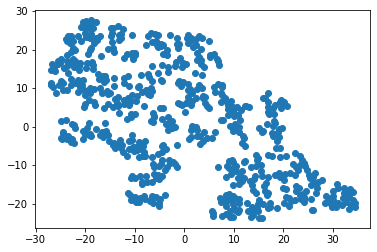

In [27]:
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()
#sort of clusters. Top left-left to middle-bottom right.

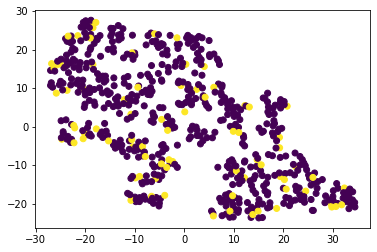

0    537
1     81
Name: MYOPIC, dtype: int64

In [30]:
labels = df['MYOPIC']
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=labels)
plt.show()
labels.value_counts()
#something seems off here. 

c:\Users\jeffr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


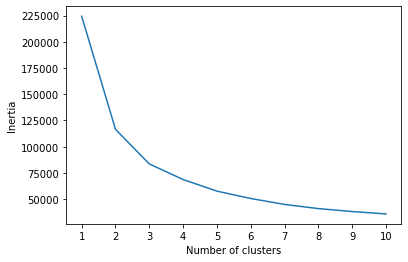

In [34]:
#either df_new(seems to work) or df_pca. So these both seem to provide identical results. I think I get why. df_new is df_pca but with data changed to principal columns?

inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_new)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#elbow is at 2-3 k. 

In [ ]:
# Yes the patients can be clustered. I would recommend 3 for more uniqueness in each cluster as opposed to 2 (even though the elbow does bend there). 4 may work still but it also may include too much'noise' data which I think could throw off the algorithm. (this is just a guess)